# non linear classification as a linear classification of $\phi(x)$

### Exercice 1

In this exercise, we will see that a non-linear classification problem can be seen as a linear classification problem in a higher dimensional space using **feature mapping**.

First consider the following model for the dataset:\
$y_i = -2 + x_{i1}^2 + x_{i2}^2 + \epsilon_i$ where $\epsilon_i$ is a random noise.

We consider two classes:
- $c_1 : \{i, y_i > 0\}$ 
- $c_2 : \{i, y_i \leq 0\}$

**Questions**:
- generate a dataset of size $n=400$ with $x_i \in \mathbb{R}^2$, $\epsilon_i$ and $y_i$ following the model above. Where $x_i$ is 2-demensional gaussian with mean $(0,0)$ and covariance matrix $\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$ and $\epsilon_i$ is a gaussian noise with mean $0$ and standard deviation $0.2$.
- fit a classical linear classifier
- fit a linear classifier on the feature mapping $\phi(x) = (1, x_1, x_2, x_1^2, x_2^2)$
- plot the classes of each datapoint given by the two classifiers and compare the results using the true classes.
- make predictions on a grid of points and plot the decision on the plane of the two classifiers. 
Compare the results using the true $\phi$ transformation.
- make a conclusion


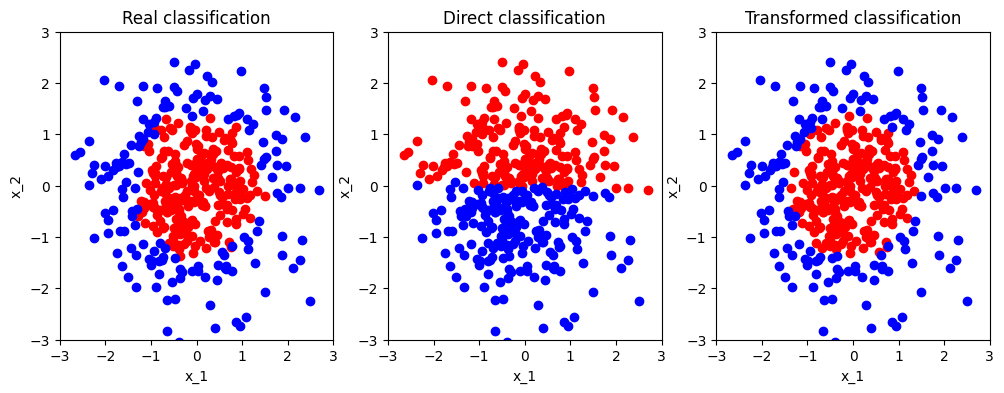

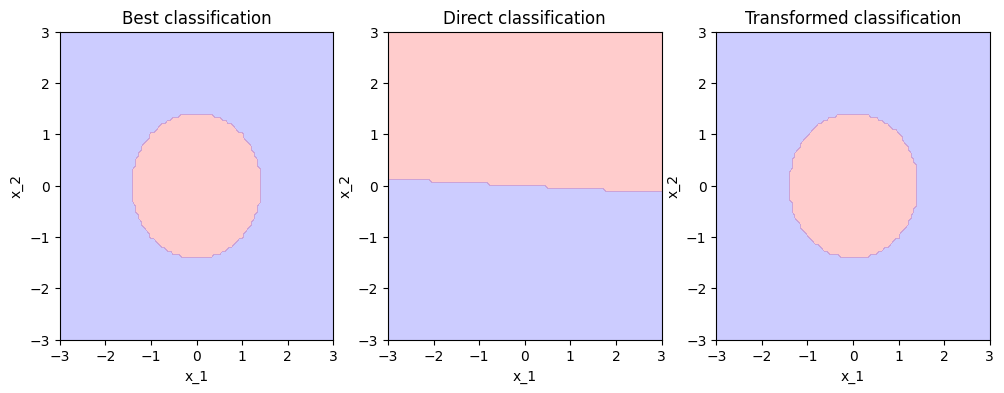

In [2]:
# showing that a non linear classification can be considered as a linear classification 
# in a higher dimension of a feature space (given by the feature transformation)

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# set random seed
np.random.seed(0)

# generate data
n = 400
x = np.random.randn(n, 2)
y = (x[:, 0]**2 + x[:, 1]**2 + 0.2 * np.random.randn(n) - 2)

# generate the feature transformation vector
X = np.c_[np.ones(n)[:, None], x, x[:, 0]**2, x[:, 1]**2]

# fit a linear model on x
model_direct = LinearRegression()
model_direct.fit(x, y)

# fit a linear model on phi(x)
model_transformed = LinearRegression()
model_transformed.fit(X, y)

# build the labels
y_hat_direct = model_direct.predict(x)
y_hat_transformed = model_transformed.predict(X)
y_true = y

# build the classes
y_class_direct = 1. * (y_hat_direct > 0)
y_class_transformed = 1. * (y_hat_transformed > 0)
y_class_true = 1. * (y_true > 0)

# plot the data
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# plot the direct classification
axs[0].scatter(x[y_class_true == 0, 0], x[y_class_true == 0, 1], color='red')
axs[0].scatter(x[y_class_true == 1, 0], x[y_class_true == 1, 1], color='blue')
axs[0].set_title('Real classification')
axs[0].set_xlabel('x_1')
axs[0].set_ylabel('x_2')

# set the limits
axs[0].set_xlim(-3, 3)
axs[0].set_ylim(-3, 3)

# plot the direct classification
axs[1].scatter(x[y_class_direct == 0, 0], x[y_class_direct == 0, 1], color='red')
axs[1].scatter(x[y_class_direct == 1, 0], x[y_class_direct == 1, 1], color='blue')
axs[1].set_title('Direct classification')
axs[1].set_xlabel('x_1')
axs[1].set_ylabel('x_2')

# set the limits
axs[1].set_xlim(-3, 3)
axs[1].set_ylim(-3, 3)

# plot the transformed classification
axs[2].scatter(x[y_class_transformed
                 == 0, 0], x[y_class_transformed == 0, 1], color='red')
axs[2].scatter(x[y_class_transformed
                 == 1, 0], x[y_class_transformed == 1, 1], color='blue')
axs[2].set_title('Transformed classification')
axs[2].set_xlabel('x_1')
axs[2].set_ylabel('x_2')

# set the limits
axs[2].set_xlim(-3, 3)
axs[2].set_ylim(-3, 3)



# plot the generalization of the classification using plane grid coloration
# generate a grid
n = 100
x1x1 = np.linspace(-3, 3, n)
x2x2 = np.linspace(-3, 3, n)
X1, X2 = np.meshgrid(x1x1, x2x2)
X = np.c_[X1.ravel(), X2.ravel()]
phi_X = np.c_[np.ones(n**2)[:, None], X, X[:, 0]**2, X[:, 1]**2]

# predict the labels
y_hat_direct = model_direct.predict(X)
y_hat_transformed = model_transformed.predict(phi_X)
y_true = 1. * (phi_X[:, 1]**2 + phi_X[:, 2]**2 > 2)
y_class_direct = 1. * (y_hat_direct > 0)
y_class_transformed = 1. * (y_hat_transformed > 0)
y_class_true = y_true

# plot subplots
fig_generalization, axs_generalization = plt.subplots(1, 3, figsize=(12, 4))

# plot the real classification
axs_generalization[0].contourf(X1, X2, y_class_true.reshape(n, n), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[0].set_title('Best classification')
axs_generalization[0].set_xlabel('x_1')
axs_generalization[0].set_ylabel('x_2')

# set the limits
axs_generalization[0].set_xlim(-3, 3)
axs_generalization[0].set_ylim(-3, 3)

# plot the direct classification
axs_generalization[1].contourf(X1, X2, y_class_direct.reshape(n, n), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[1].set_title('Direct classification')
axs_generalization[1].set_xlabel('x_1')
axs_generalization[1].set_ylabel('x_2')

# set the limits
axs_generalization[1].set_xlim(-3, 3)
axs_generalization[1].set_ylim(-3, 3)

# plot the transformed classification
axs_generalization[2].contourf(X1, X2, y_class_transformed.reshape(n, n), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[2].set_title('Transformed classification')
axs_generalization[2].set_xlabel('x_1')
axs_generalization[2].set_ylabel('x_2')

# set the limits
axs_generalization[2].set_xlim(-3, 3)
axs_generalization[2].set_ylim(-3, 3)

# show the plot
plt.show()


# Regularization with Lasso (feature selection + solution to overfitting)

### Exercice 2

In this exercise, we will see how Lasso can be used to perform feature selection and to prevent overfitting.

Consider the following model for the dataset:\
$y_i = 4\times x_{i1} + 2 \times x_{i1} \times x_{i2} + \epsilon_i$ where $\epsilon_i$ is a random noise.

We consider two classes:
- $c_1 : \{i, y_i > 0\}$
- $c_2 : \{i, y_i \leq 0\}$


**Questions**:
- generate a dataset of size $n=400$ with $x_i \in \mathbb{R}^2$, $\epsilon_i$ and $y_i$ following the model above. Where $x_i$ is 2-demensional gaussian with mean $(0,0)$ and covariance matrix $\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$ and $\epsilon_i$ is a gaussian noise with mean $0$ and variance $1$.
- fit a linear classifier on the feature mapping $\phi(x) = (1, x_1, x_2, x_1x_2, x_1^2, x_2^2)$
- fit a Lasso classifier on the feature mapping $\phi(x) = (1, x_1, x_2, x_1x_2, x_1^2, x_2^2)$ with $\alpha = 0.5$
- compare the coefficients of the two classifiers with the true coefficients.
- plot the classes of each datapoint given by the two classifiers and compare the results using the true classes.
- make predictions on a grid of points and plot the decision on the plane of the two classifiers.
- make a conclusion

Term    | Real | Lasso Estimated | Direct Regression 
----------------------------------------------------
1       | 0.00 |      0.00       |       0.00       
x_1     | 4.00 |      3.46       |       3.98       
x_2     | 0.00 |      0.00       |       -0.03      
x_1 x_2 | 2.00 |      1.44       |       1.99       
x_1^2   | 0.00 |      0.00       |       0.01       
x_2^2   | 0.00 |      0.00       |       -0.01      





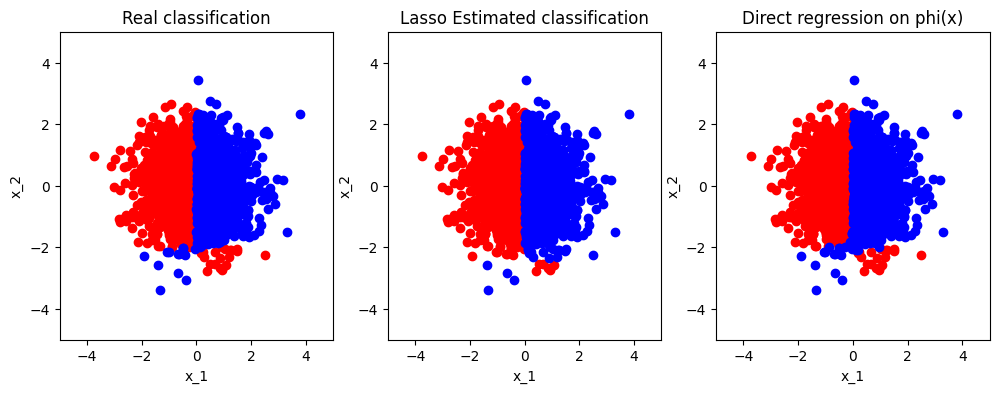

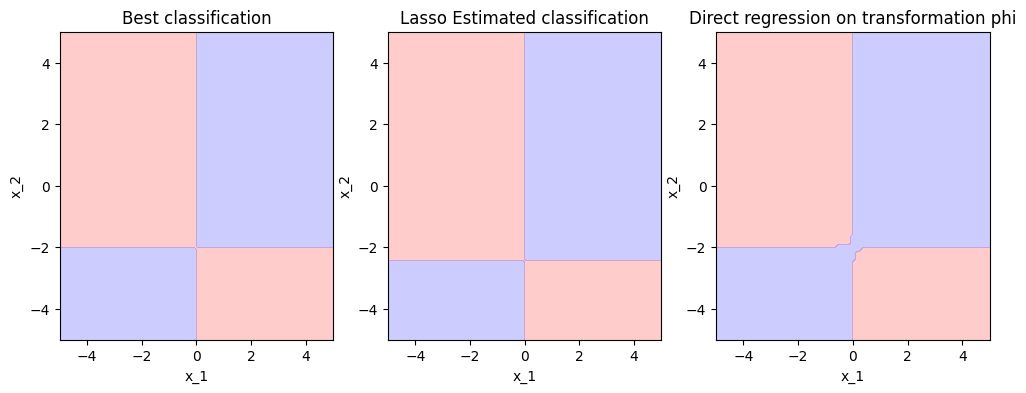

In [3]:
# using lasso to select the most important features
# y = 4*x_1 + 2 x_1 x_2 + e
# phi(x) = [1, x_1, x_2, x_1 x_2, x_1^2, x_2^2]

# import libraries
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# set random seed
np.random.seed(0)

# generate data
n = 2000
x = np.random.randn(n, 2)
y = 4*x[:, 0] + 2 * x[:, 0] * x[:, 1] + np.random.randn(n)

# compute phi(x)
phi_x = np.c_[np.ones(n)[:,None], x, x[:, 0] * x[:, 1], x[:, 0]**2, x[:, 1]**2]

# fit a lasso model
model = Lasso(alpha=0.5)
model.fit(phi_x, y)

# compare the lasse with direct classification on phi(x)
# fit a linear model on phi(x)
direct_model = LinearRegression()
direct_model.fit(phi_x, y)

# print the coefficients
real_coefs = np.array([0, 4, 0, 2, 0, 0])
phi_terms = ['1', 'x_1', 'x_2', 'x_1 x_2', 'x_1^2', 'x_2^2']
max_term_length = max([len(term) for term in phi_terms])
print(f"{'Term':<{max_term_length}} | Real | Lasso Estimated | Direct Regression ")
print("-" * (max_term_length + 45))
for i in range(6):
    estimated_coef = str(f"{model.coef_[i]:.2f}")
    if model.coef_[i] == 0:
        estimated_coef = "0.00" 
    estimated_coef_sign = " " if model.coef_[i] > 0 else ""
    estimated_coef = estimated_coef_sign + estimated_coef + " " * (5 - len(estimated_coef))
    estimated_coef_direct = str(f"{direct_model.coef_[i]:.2f}")
    if direct_model.coef_[i] == 0:
        estimated_coef_direct = "0.00" 
    estimated_coef_sign_direct = " " if direct_model.coef_[i] > 0 else ""
    estimated_coef_direct = estimated_coef_sign_direct + estimated_coef_direct + " " * (5 - len(estimated_coef_direct))
    phi_term = phi_terms[i]
    phi_term += " " * (max_term_length - len(phi_term))
    estimated_coef_space_left = " " * int(np.floor((15 - len(estimated_coef))/2))
    estimated_coef_space_right = " " * int(np.ceil((15 - len(estimated_coef))/2))
    estimated_coef_direct_space_left = " " * int(np.floor((17 - len(estimated_coef_direct))/2))
    estimated_coef_direct_space_right = " " * int(np.ceil((17 - len(estimated_coef_direct))/2))
    
    print(f"{phi_term} | {real_coefs[i]:.2f} | {estimated_coef_space_left}{estimated_coef}"
          f"{estimated_coef_space_right} | {estimated_coef_direct_space_left}{estimated_coef_direct}"
          f"{estimated_coef_direct_space_right}")
print("\n"*2)

# plot two figures
# the first one is plane classification (using two colors) with the real coefficients
# the second one is plane classification (using two colors) with the estimated coefficients
# class 1: y<0 and class 2: y>0 with e=0Real

# predict the labels
y_hat = np.dot(phi_x, real_coefs)
y_hat_estimated = np.dot(phi_x, model.coef_)
y_hat_class = 1. * (y_hat > 0)
y_hat_estimated_class = 1. * (y_hat_estimated > 0)
y_hat_direct = direct_model.predict(phi_x)
y_hat_direct_class = 1. * (y_hat_direct > 0)

# plot subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# plot the real classification
axs[0].scatter(x[y_hat_class == 0, 0], x[y_hat_class == 0, 1], color='red')
axs[0].scatter(x[y_hat_class == 1, 0], x[y_hat_class == 1, 1], color='blue')
axs[0].set_title('Real classification')
axs[0].set_xlabel('x_1')
axs[0].set_ylabel('x_2')

# set the limits
axs[0].set_xlim(-5, 5)
axs[0].set_ylim(-5, 5)

# plot the estimated classification
axs[1].scatter(x[y_hat_estimated_class == 0, 0], x[y_hat_estimated_class == 0, 1], color='red')
axs[1].scatter(x[y_hat_estimated_class == 1, 0], x[y_hat_estimated_class == 1, 1], color='blue')
axs[1].set_title('Lasso Estimated classification')
axs[1].set_xlabel('x_1')
axs[1].set_ylabel('x_2')

# set the limits
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)

# plot the direct classification
axs[2].scatter(x[y_hat_direct_class == 0, 0], x[y_hat_direct_class == 0, 1], color='red')
axs[2].scatter(x[y_hat_direct_class == 1, 0], x[y_hat_direct_class == 1, 1], color='blue')
axs[2].set_title('Direct regression on phi(x)')
axs[2].set_xlabel('x_1')
axs[2].set_ylabel('x_2')

# set the limits
axs[2].set_xlim(-5, 5)
axs[2].set_ylim(-5, 5)



# now do the plane grid coloration with both the real coefficients and the estimated coefficients
# generate a grid
n = 100
x1x1 = np.linspace(-5, 5, n)
x2x2 = np.linspace(-5, 5, n)
X1, X2 = np.meshgrid(x1x1, x2x2)
X = np.c_[X1.ravel(), X2.ravel()]
phi_X = np.c_[np.ones(n**2)[:,None], X, X[:, 0] * X[:, 1], X[:, 0]**2, X[:, 1]**2]

# predict the labels
y_hat = np.dot(phi_X, real_coefs)
y_hat_estimated = np.dot(phi_X, model.coef_)
y_hat_class = 1. * (y_hat > 0)
y_hat_estimated_class = 1. * (y_hat_estimated > 0)
y_hat_direct = direct_model.predict(phi_X)
y_hat_direct_class = 1. * (y_hat_direct > 0)

# plot subplots
fig_generalization, axs_generalization = plt.subplots(1, 3, figsize=(12, 4))

# plot the real classification
axs_generalization[0].contourf(X1, X2, y_hat_class.reshape(n, n), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[0].set_title('Best classification')
axs_generalization[0].set_xlabel('x_1')
axs_generalization[0].set_ylabel('x_2')

# set the limits
axs_generalization[0].set_xlim(-5, 5)
axs_generalization[0].set_ylim(-5, 5)

# plot the estimated classification
axs_generalization[1].contourf(X1, X2, y_hat_estimated_class.reshape(n, n), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[1].set_title('Lasso Estimated classification')
axs_generalization[1].set_xlabel('x_1')
axs_generalization[1].set_ylabel('x_2')

# set the limits
axs_generalization[1].set_xlim(-5, 5)
axs_generalization[1].set_ylim(-5, 5)

# plot the direct classification
axs_generalization[2].contourf(X1, X2, y_hat_direct_class.reshape(n, n), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[2].set_title('Direct regression on transformation phi')
axs_generalization[2].set_xlabel('x_1')
axs_generalization[2].set_ylabel('x_2')

# set the limits
axs_generalization[2].set_xlim(-5, 5)
axs_generalization[2].set_ylim(-5, 5)

# show the plot
plt.show()


# kernel SVM (solution to general non-linear classification)

### Exercice 3

In general, we can not define a feature mapping $\phi$ that will make the classification problem linear. However, we can use the kernel trick to make the classification problem linear in the feature space. \
In this exercise, we will see how kernel SVM can be used to perform a general non-linear classification.

Consider the following model for the dataset:\
$y_i = 2\times x_{i1}^3 + 4 \times e^{-(|x_{i1}| + x_{i2}^2)} + \epsilon_i$ where $\epsilon_i$ is a random noise.

**In the model above, there is no rule to guess feature mapping $\phi$ that will make the classification problem linear.**\
with $\phi: (x_1, x_2) \rightarrow (1, x_1^3, e^{-(|x_1| + x_2^2)})$

We consider two classes:
- $c_1 : \{i, y_i > 0\}$
- $c_2 : \{i, y_i \leq 0\}$

**Questions**:
- generate a dataset of size $n=400$ with $x_i \in \mathbb{R}^2$, $\epsilon_i$ and $y_i$ following the model above. Where $x_i$ is 2-demensional gaussian with mean $(0,0)$ and covariance matrix $\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$ and $\epsilon_i$ is a gaussian noise with mean $0$ and standard deviation $0.5$.
- fit a kernel SVM classifier with a Gaussian kernel on $x$ without feature mapping.
- plot the classes of each datapoint given by the classifier and compare the results using the true classes.
- make predictions on a grid of points and plot the decision on the plane of the classifier.
- make a conclusion

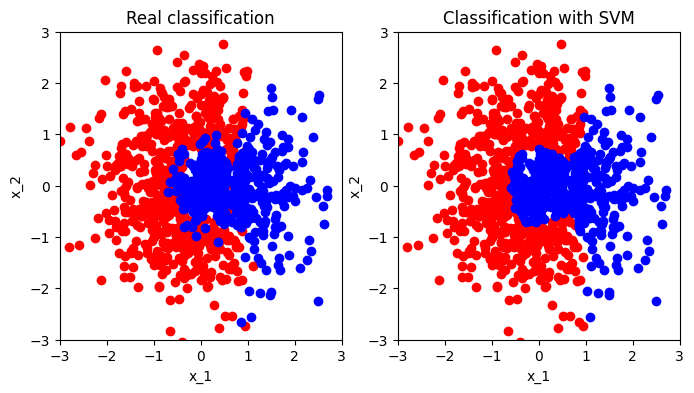

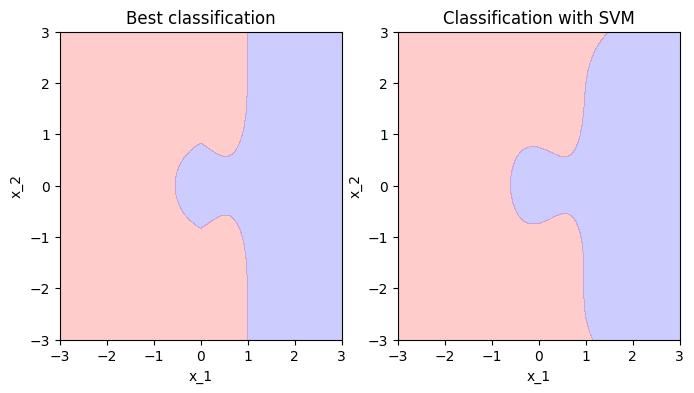

In [4]:
# test SVM using rbf kernel on the following model
# y = 2*x_1^3 + 4*exp(-x_2^2 - abs(x_1)) + e

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# set random seed
np.random.seed(0)

# generate data
n = 1000
x = np.random.randn(n, 2)
y = 2*x[:, 0]**3 + 4*np.exp(-x[:, 1]**2 - np.abs(x[:, 0])) + 0.5*np.random.randn(n)

# fit a SVM model
model = SVR(kernel='rbf')
model.fit(x, y)

# data points labels 
y_hat = model.predict(x)
y_true = y
y_hat_class = 1. * (y_hat > 2)
y_true_class = 1. * (y_true > 2)

# plot the data
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# plot the real classification
axs[0].scatter(x[y_true_class == 0, 0], x[y_true_class == 0, 1], color='red')
axs[0].scatter(x[y_true_class == 1, 0], x[y_true_class == 1, 1], color='blue')
axs[0].set_title('Real classification')
axs[0].set_xlabel('x_1')
axs[0].set_ylabel('x_2')

# set the limits
axs[0].set_xlim(-3, 3)
axs[0].set_ylim(-3, 3)

# plot the estimated classification
axs[1].scatter(x[y_hat_class == 0, 0], x[y_hat_class == 0, 1], color='red')
axs[1].scatter(x[y_hat_class == 1, 0], x[y_hat_class == 1, 1], color='blue')
axs[1].set_title('Classification with SVM')
axs[1].set_xlabel('x_1')
axs[1].set_ylabel('x_2')

# set the limits
axs[1].set_xlim(-3, 3)
axs[1].set_ylim(-3, 3)



# now do the plane grid coloration with both the real coefficients and the estimated coefficients
# generate a grid
n = 1000
x1x1 = np.linspace(-3, 3, n)
x2x2 = np.linspace(-3, 3, n)
X1, X2 = np.meshgrid(x1x1, x2x2)
X = np.c_[X1.ravel(), X2.ravel()]

# predict the labels
y_hat = model.predict(X)
y_true = 2*X[:, 0]**3 + 4*np.exp(-X[:, 1]**2 - np.abs(X[:, 0]))
y_class_true = 1. * (y_true > 2)
y_class = 1. * (y_hat > 2)

# plot subplots
fig_generalization, axs_generalization = plt.subplots(1, 2, figsize=(8, 4))

# plot the real classification
axs_generalization[0].contourf(X1, X2, y_class_true.reshape(n, n), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[0].set_title('Best classification')
axs_generalization[0].set_xlabel('x_1')
axs_generalization[0].set_ylabel('x_2')

# set the limits
axs_generalization[0].set_xlim(-3, 3)
axs_generalization[0].set_ylim(-3, 3)

# plot the estimated classification
axs_generalization[1].contourf(X1, X2, y_class.reshape(n, n), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[1].set_title('Classification with SVM')
axs_generalization[1].set_xlabel('x_1')
axs_generalization[1].set_ylabel('x_2')

# set the limits
axs_generalization[1].set_xlim(-3, 3)
axs_generalization[1].set_ylim(-3, 3)

# show the plot
plt.show()